## 2022-02-17: Tests for Uniformity of Distributions on Unit Hyperspheres

*Last Updated*: 2022-02-18

### Authors
* Kevin Chu (kevin@velexi.com)

### Overview
In this Jupyter notebook, we explore tests for uniformity of distributions on unit hyperspheres.

### Methodology

* For several values of the spatial dimension, draw `num_samples` vectors from a multivariate normal distribution with unit covariance matrix and normalize each vector to have unit norm.

* For each sample, perform the following three tests for uniformity of the distribution on the unit hypersphere.

    * Anderson-Darling Test
    
    * Kolmogorov-Smirnov Test (Exact)
    
    * Kolmogorov-Smirnov Test (Asymptotic)    

In [1]:
# --- Imports

import Distributions
using Distributions: MvNormal, Uniform, ContinuousUnivariateDistribution, cdf, pdf
using HypothesisTests
using LinearAlgebra
using Plots
using Random

### Tests for Uniformity of Distribution on a Circle

In [2]:
# --- Generate sample of vectors drawn from a uniform distribution on a unit circle

n = 2
num_samples_2d = 10000

# Generate vectors
dist = MvNormal(zeros(n), ones(n))
num_vectors = num_samples_2d
vectors = rand(dist, num_vectors)
for i = 1:num_vectors
    vectors[:, i] /= norm(vectors[:, i])
end

# dist = Uniform(-π, π)
# num_vectors = num_samples_2d
# theta = rand(dist, num_vectors)
# vectors = transpose(hcat(cos.(theta), sin.(theta)))

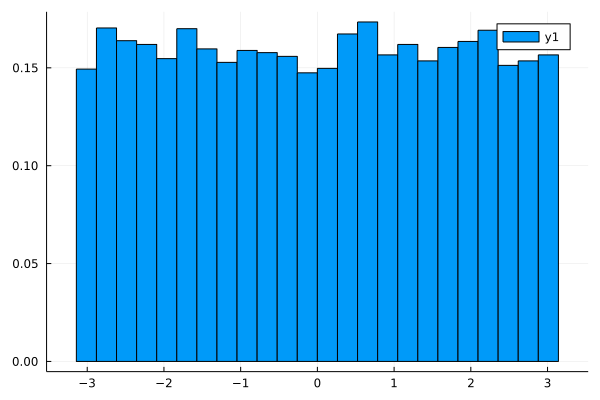

Expected density: 0.15915494309189535


In [3]:
# --- Plot histogram of angles

thetas = map(i -> atan(vectors[:, i][2], vectors[:, i][1]), 1:num_vectors)

num_hist_bins = 25
hist_bins = range(-pi, pi; length=num_hist_bins)
hist = histogram(thetas; bins=hist_bins, normalize=true)
plt = plot(hist)

expected_pdf_2d = 0.5 / π
println("Expected density: $(expected_pdf_2d)")

# Display plot
display(plt)

In [4]:
# --- Perform test for uniformity on the circle

# Analytical formula for distribution over angle from x-axis
struct ThetaDistribution2D <: ContinuousUnivariateDistribution end
Distributions.pdf(dist::ThetaDistribution2D, x::Real) = 0.5 / π
Distributions.cdf(dist::ThetaDistribution2D, x::Real) = 0.5 * (x + π) / π

dist = ThetaDistribution2D()

# Perform Anderson-Darling Test
test_results = OneSampleADTest(thetas, dist)
println(test_results)

test_results = ExactOneSampleKSTest(thetas, dist)
println(test_results)

test_results = ApproximateOneSampleKSTest(thetas, dist)
println(test_results)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.7640

Details:
    number of observations:   10000
    sample mean:              -0.0068515679667614056
    sample SD:                1.8136802739569604
    A² statistic:             0.48323597232298093

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00624745

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8275

Details:
    number of observations:   10000

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population de

### Tests for Uniformity of Distribution on a Sphere

In [5]:
# --- Generate sample of vectors drawn from a uniform distribution on a unit sphere

n = 3
num_samples_3d = 50000

# Generate vectors
dist = MvNormal(zeros(n), ones(n))
num_vectors = num_samples_3d
vectors = rand(dist, num_vectors)
for i = 1:num_vectors
    vectors[:, i] /= norm(vectors[:, i])
end

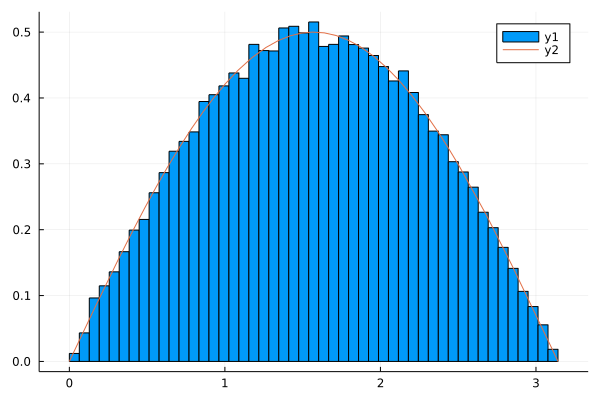

In [6]:
# --- Plot histogram of angles

thetas = map(i -> atan(norm(vectors[:, i][2:end]), vectors[:, i][1]), 1:num_vectors)

num_hist_bins = 50
hist_bins = range(0, π; length=num_hist_bins)
hist = histogram(thetas; bins=hist_bins, normalize=true)
plt = plot(hist)

expected_pdf_3d(x) = 0.5 * sin(x)
plt = plot!(expected_pdf_3d, 0, π)

# Display plot
display(plt)

In [7]:
# --- Perform test for uniformity on the sphere

# Analytical formula for distribution over angle from x-axis
struct ThetaDistribution3D <: ContinuousUnivariateDistribution end
Distributions.cdf(dist::ThetaDistribution3D, x::Real) = 0.5 * (1 - cos(x))

dist = ThetaDistribution3D()

# Perform Anderson-Darling Test
test_results = OneSampleADTest(thetas, dist)
println(test_results)

test_results = ExactOneSampleKSTest(thetas, dist)
println(test_results)

test_results = ApproximateOneSampleKSTest(thetas, dist)
println(test_results)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.9090

Details:
    number of observations:   50000
    sample mean:              1.5723980018418944
    sample SD:                0.6837193137787765
    A² statistic:             0.335864545654094

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00205467

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9842

Details:
    number of observations:   50000

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:

### Tests for Uniformity of Distribution on an $n$-Dimensional Hypersphere

__Notes__

* For unit vectors uniformly distributed on an $n$-dimensional hypersphere, we can derive an analytical formula for the CDF $F(\theta)$ of the probability distribution over $\theta$ (the angle that the vector makes with the $x_1$-axis). The probability density $p(\theta)$ of vectors at an angle $\theta$ from the $x_1$-axis is proportional to the surface area of the $(n-2)$-dimensional hypersphere with radius $\sin(\theta)$. Therefore, the $p(\theta)$ is proportional to $\sin^{n-2}(\theta)$. To derive analytical expressions for $F(\theta)$, we can integrate $\sin^{n-2}(\theta)$ using the identity $\sin(\theta) = \frac{1}{2i}(e^{i \theta} - e^{-i \theta})$ to express $\sin^{n-2}(\theta)$ as a sum of terms that are straightforward to integrate:

$$
\sin^{k}(\theta)
= \frac{1}{(2i)^k} \sum_{j = 0}^k (-1)^{k-j} {k \choose j} e^{i (2j-k) \theta}
= \frac{1}{(2i)^k} \sum_{j = 0}^k (-1)^{j} {k \choose j} e^{i (k-2j) \theta}
$$


#### $n$ Even
      
When $k$ is even, $i^k = (-1)^{k/2}$ and the sums is symmetric about the center term $j = k/2$. Applying these observations, we find that
    
$$
\sin^{k}(\theta) 
= \frac{(-1)^{k/2}}{2^k} \sum_{j = 0}^k (-1)^{j} {k \choose j}
                         \frac{e^{i (k-2j) \theta} + e^{i (2j-k) \theta}}{2} \\
= \frac{(-1)^{k/2}}{2^k} \sum_{j = 0}^k (-1)^{j} {k \choose j} \cos((k-2j) \theta) \\
= \frac{(-1)^{k/2}}{2^k} \left(
    (-1)^{k/2} {k \choose k/2}
    + 2 \sum_{j = 0}^{k/2 - 1} (-1)^{j} {k \choose j}  \cos((k-2j) \theta)
    \right).
$$
      
Integrating this expression, we find that
      
$$
F(\theta)
= \frac{(-1)^{k/2}}{\pi {k \choose k/2}} \left(
    (-1)^{k/2} {k \choose k/2} \theta
    + 2 \sum_{j = 0}^{k/2 - 1} (-1)^{j}
        {k \choose j} \frac{\sin((k-2j) \theta)}{k-2j}
    \right)
$$

In [8]:
# --- Generate sample of vectors drawn from a uniform distribution on a unit sphere

n = 20
num_samples = 50000

# Generate vectors
dist = MvNormal(zeros(n), ones(n))
num_vectors = num_samples
vectors = rand(dist, num_vectors)
for i = 1:num_vectors
    vectors[:, i] /= norm(vectors[:, i])
end

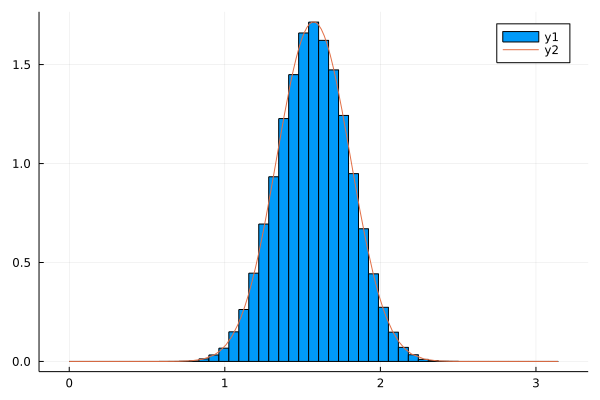

In [9]:
# --- Plot histogram of angles

thetas = map(i -> atan(norm(vectors[:, i][2:end]), vectors[:, i][1]), 1:num_vectors)

num_hist_bins = 50
hist_bins = range(0, π; length=num_hist_bins)
hist = histogram(thetas; bins=hist_bins, normalize=true)
plt = plot(hist)

expected_pdf_nd(x) = (2^(n-2) / π / binomial(n-2, (n-2) ÷ 2)) * sin(x)^(n-2)
plt = plot!(expected_pdf_nd, 0, π)

# Display plot
display(plt)

In [10]:
# --- Perform test for uniformity on the hypersphere

# Analytical formula for distribution over angle from x-axis
struct ThetaDistributionND <: ContinuousUnivariateDistribution end

function Distributions.cdf(dist::ThetaDistributionND, x::Real)
    k = n-2
    sgn = (-1)^(k÷2)
    value = 0
    for j = 0:(k÷2 - 1)
        value += (-1)^j * binomial(k, j) * sin((k - 2*j) * x) / (k - 2*j)
    end
    value *= 2
    value += sgn * binomial(k, k÷2) * x  # contribution from i = k÷2 term
    value *= sgn / π / binomial(k, k ÷ 2)

    return value
end

dist = ThetaDistributionND()

# Perform Anderson-Darling Test
test_results = OneSampleADTest(thetas, dist)
println(test_results)

test_results = ExactOneSampleKSTest(thetas, dist)
println(test_results)

test_results = ApproximateOneSampleKSTest(thetas, dist)
println(test_results)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.7397

Details:
    number of observations:   50000
    sample mean:              1.5713236832178399
    sample SD:                0.22949039152146428
    A² statistic:             0.5069506691626905

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00299484

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7610

Details:
    number of observations:   50000

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population detail

#### $n$ Odd

When $k$ is odd, the $j$-th and $(k-j)$-th terms have opposite signs, so we find that
    
$$
\sin^{k}(\theta) 
= \frac{1}{(2i)^k} \sum_{j = 0}^k (-1)^{j} {k \choose j}
                   \frac{e^{i (k-2j) \theta} - e^{i (2j-k) \theta}}{2} \\
= \frac{(-1)^{(k-1)/2}}{2^k} \sum_{j = 0}^k (-1)^{j} {k \choose j}
                             \frac{e^{i (k-2j) \theta} - e^{i (2j-k) \theta}}{2i} \\
= \frac{(-1)^{(k-1)/2}}{2^k} \sum_{j = 0}^k (-1)^{j} {k \choose j} \sin((k-2j) \theta).
$$
      
Integrating this expression, we find that
      
$$
F(\theta) = N \sum_{j = 0}^k (-1)^{j} {k \choose j} \frac{1 - \cos((k-2j) \theta)}{k-2j}
$$
      
where

$$
N = \frac{1}{2} 
    \left( \sum_{j = 0}^k (-1)^{j} {k \choose j} \left( \frac{1}{k-2j} \right) \right)^{-1}
$$

In [11]:
# --- Generate sample of vectors drawn from a uniform distribution on a unit sphere

n = 45
num_samples = 50000

# Generate vectors
dist = MvNormal(zeros(n), ones(n))
num_vectors = num_samples
vectors = rand(dist, num_vectors)
for i = 1:num_vectors
    vectors[:, i] /= norm(vectors[:, i])
end

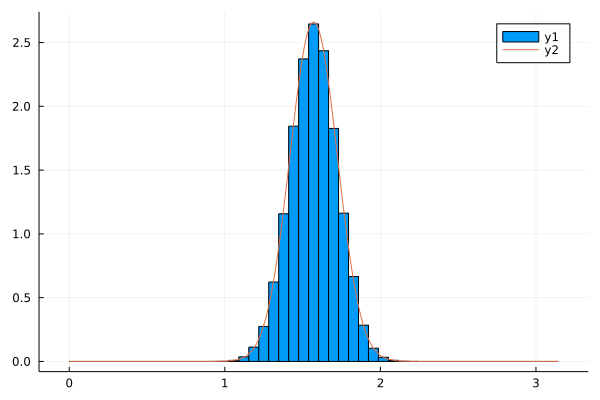

In [12]:
# --- Plot histogram of angles

thetas = map(i -> atan(norm(vectors[:, i][2:end]), vectors[:, i][1]), 1:num_vectors)

num_hist_bins = 50
hist_bins = range(0, π; length=num_hist_bins)
hist = histogram(thetas; bins=hist_bins, normalize=true)
plt = plot(hist)

expected_pdf_nd(x) = (2^(n-2) / π / binomial(n-2, (n-2) ÷ 2)) * sin(x)^(n-2)
plt = plot!(expected_pdf_nd, 0, π)

# Display plot
display(plt)

In [13]:
# --- Perform test for uniformity on the hypersphere

# Analytical formula for distribution over angle from x-axis
struct ThetaDistributionND <: ContinuousUnivariateDistribution end

function Distributions.cdf(dist::ThetaDistributionND, x::Real)
    k = n-2
    value = 0
    normalization = 0
    for j = 0:k
        coef = (-1)^j * binomial(k, j) / (k - 2*j)
        value += coef * (1 - cos((k - 2*j) * x))
        normalization += coef
    end
    normalization = 0.5 / normalization
    value *= normalization

    return value
end

dist = ThetaDistributionND()

# Perform Anderson-Darling Test
test_results = OneSampleADTest(thetas, dist)
println(test_results)

test_results = ExactOneSampleKSTest(thetas, dist)
println(test_results)

test_results = ApproximateOneSampleKSTest(thetas, dist)
println(test_results)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.1808

Details:
    number of observations:   50000
    sample mean:              1.5715914890135794
    sample SD:                0.15064017941411526
    A² statistic:             1.4821670074795914

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00507063

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.1528

Details:
    number of observations:   50000

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population detail